<a href="https://colab.research.google.com/github/AhmedKamal75/newRepo/blob/main/Bounding_Box_Using_CelebA(Hugging_Face).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets torch torchvision transformers

In [2]:
from datasets import load_dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torch

# Load the CelebA dataset from Hugging Face
# https://huggingface.co/datasets/hfaus/CelebA_bbox_and_facepoints
dataset = load_dataset("hfaus/CelebA_bbox_and_facepoints", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


CelebA_bbox_and_facepoints.py:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

celebA_train.zip:   0%|          | 0.00/8.35G [00:00<?, ?B/s]

celebA_val.zip:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

celebA_test.zip:   0%|          | 0.00/964M [00:00<?, ?B/s]

data/list_eval_partition.txt:   0%|          | 0.00/2.63M [00:00<?, ?B/s]

data/list_bbox_celeba.txt:   0%|          | 0.00/5.88M [00:00<?, ?B/s]

list_landmarks_celeba.txt:   0%|          | 0.00/12.4M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

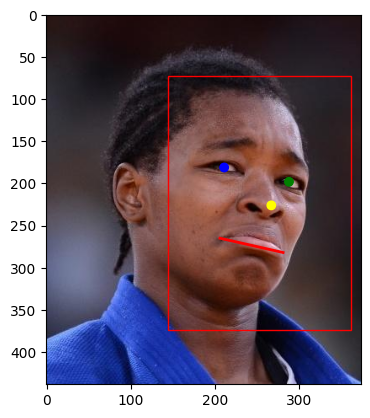

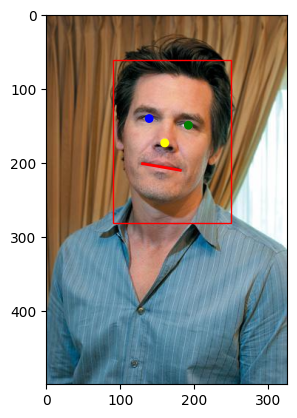

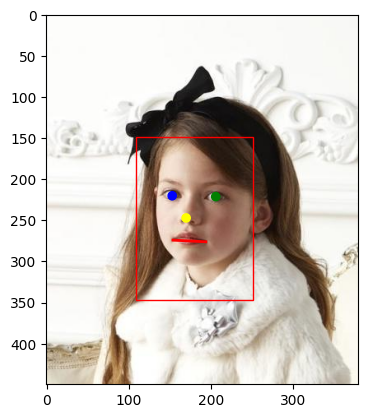

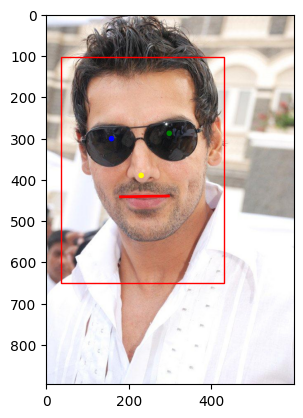

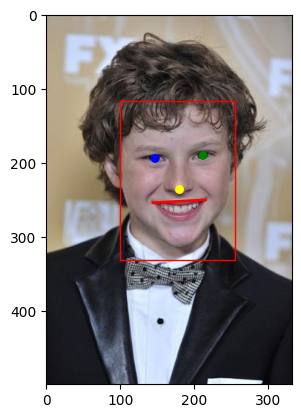

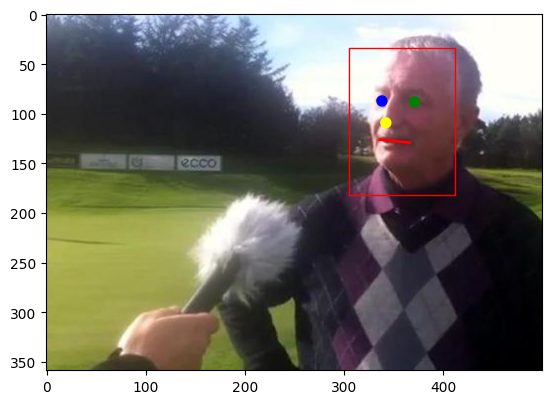

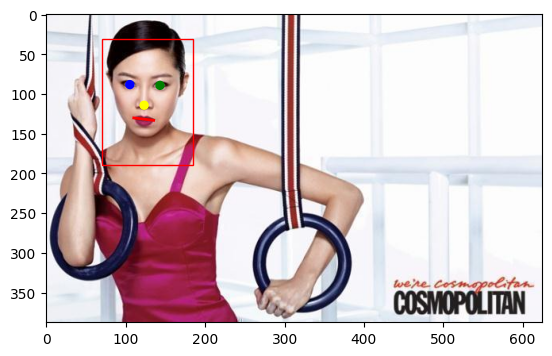

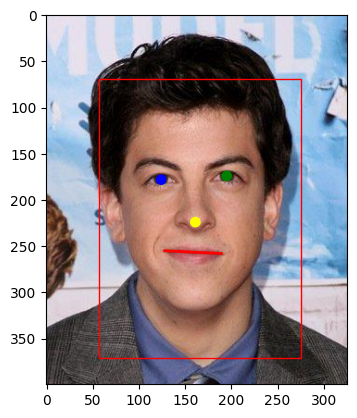

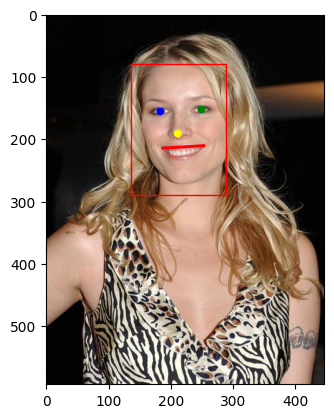

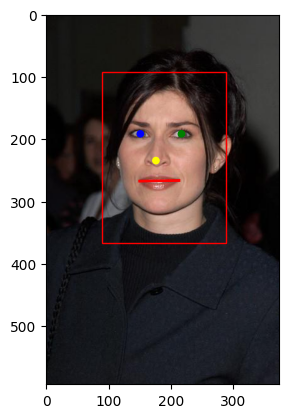

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def show_image_with_bbox_and_landmarks(index):
  """
  Displays an image from the dataset with bounding box and landmarks.

  Args:
    index: The index of the image in the dataset to display.
  """

  example = dataset['train'][index]
  image = example['image']
  bbox = example['bbox']  # bbox is now [x1, y1, width, height]
  landmarks = example['facial_landmarks']

  plt.imshow(image)
  ax = plt.gca()

  # Draw bounding box using x1, y1, width, height
  rect = patches.Rectangle(
      (bbox[0], bbox[1]),  # Using x1, y1 as starting point
      bbox[2],             # Using width
      bbox[3],             # Using height
      linewidth=1,
      edgecolor='r',
      facecolor='none'
  )
  ax.add_patch(rect)

  ax.add_patch(patches.Circle((landmarks['lefteye'][0], landmarks['lefteye'][1]), radius=5, color='blue'))
  ax.add_patch(patches.Circle((landmarks['righteye'][0], landmarks['righteye'][1]), radius=5, color='green'))
  ax.add_patch(patches.Circle((landmarks['nose'][0], landmarks['nose'][1]), radius=5, color='yellow'))
  ax.plot([landmarks['leftmouth'][0], landmarks['rightmouth'][0]],
          [landmarks['leftmouth'][1], landmarks['rightmouth'][1]],
          color='red', linewidth=2)

  plt.show()
for i in range(10):
  r = np.random.randint(0, 162770)
  show_image_with_bbox_and_landmarks(r)